# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [2]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest, euclidean distance and confidence interval
from scipy import stats
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean
from scipy.spatial import distance

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# displaying markdown strings
from IPython.display import display, Markdown, Latex

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

3. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---


**Task 1 Question 1**

In [4]:
#Load the data
data = pd.read_csv('drive/MyDrive/ADA2021_HW/HW2/data/pitchfork.csv.gz', compression='gzip')

#Change type for releaseyear (float64 to int64)
data['releaseyear'] = data['releaseyear'].astype(np.int64)

In [5]:
#Remove the duplicates (same album and same artist)
data_drop_duplicate = data.copy()
data_drop_duplicate = data_drop_duplicate.drop_duplicates(subset=['album', 'artist'], keep='first')
nbr_duplicates = data.shape[0] - data_drop_duplicate.shape[0]
print("We have removed {} duplicates. We have {} rows in our database.".format(nbr_duplicates,data_drop_duplicate.shape[0]))

We have removed 47 duplicates. We have 16738 rows in our database.


**Task 1 Question 2**

Between 1957 and 1999, we have 778 albums. Which represents 4.65% of our dataset.
Between 1999 and 2019, we have 15960 albums. Which represents 95.35% of our dataset.


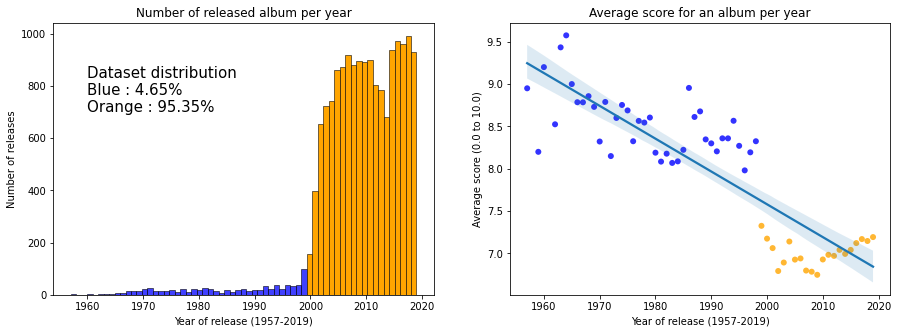

In [6]:
#Show data distribution before 1999 and after 1999
data_distribution = data_drop_duplicate.copy()
data_distribution["year_range"] = pd.cut(data_distribution.releaseyear, bins=[1956,1999,2019], right=True)
data_distribution = data_distribution.groupby("year_range").size()

#nbr of albums between 1957-1999 and 1999-2019
album_1957_1999 = data_distribution[0]
album_1999_2019 = data_distribution[1]
total_albums = album_1957_1999 + album_1999_2019

percentage_1957_1999 = round(100*album_1957_1999/total_albums, 2)
percentage_1999_2019 = round(100*album_1999_2019/total_albums, 2)

print("Between 1957 and 1999, we have {} albums. Which represents {}% of our dataset.".format(album_1957_1999,percentage_1957_1999))
print("Between 1999 and 2019, we have {} albums. Which represents {}% of our dataset.".format(album_1999_2019,percentage_1999_2019))

#Plot data dsitribution and mean score per year
data_plot = data_drop_duplicate.copy()

#calculate the mean score per year
score_per_year = data_plot.groupby('releaseyear', as_index=False)['score'].mean()

#different colors for post and pre 1999
score_per_year['color']= np.where(score_per_year['releaseyear']< 1999, "blue" , "orange")

#plot two figures 
fig, axs = plt.subplots(ncols = 2, sharex=True, figsize=(15, 5))
sns.histplot(data=data_plot, x="releaseyear", kde=False,color="blue", bins=63, ax = axs[0])
sns.regplot(data=score_per_year, x="releaseyear", y="score", ax = axs[1],scatter_kws={'facecolors':score_per_year['color'], 'edgecolor':"none" })

#change color for post 1999
for rect in axs[0].patches:
    if rect.get_x() >= 1999:
        rect.set_color("orange")
        rect.set_ec("black")

axs[0].set_title('Number of released album per year')
axs[0].set(xlabel="Year of release (1957-2019)", ylabel = "Number of releases")

axs[1].set(xlabel="Year of release (1957-2019)", ylabel = "Average score (0.0 to 10.0)")
axs[1].set_title('Average score for an album per year')

_ = axs[0].annotate('Dataset distribution \nBlue : {}%  \nOrange : {}%'.format(percentage_1957_1999,percentage_1999_2019), (1960, 700), color="black",size=15)

We can observe from the histogram that our data is not  uniformly distributed in time. Less than 5% of our data come from a range that represents 70% of our timeline (1957-1999). Regarding the scores, we can observe a decrease of its value with respect to time. However, because our dataset is not uniformly distributed, we should be careful when interpreting the result. We can see that between 1999 and 2019, the score seems to have no evolution with respect to time (points in orange). 

Thanks to  technological progress, it is easier for people, regardless of their talent, to record themselves. This could be an explanation for the increase in the number of albums after 1999 and the decrease in average of the score. 


**Task 1 Question 3**

We know that the following 8 variables should have values bigger than 0 : Danceability, Energy, Speechiness, Acousticness, Instrumentalness, Liveness, Valence and Tempo. Based on a previous analysis, we have seen that some rows contains negative values for some of these columns. We decided to remove these rows : 

In [7]:
#Remove rows with negative values for specific columns 
data_cleaned = data_drop_duplicate.copy()
columns = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness","liveness", "valence","tempo"]

for column in columns: 
  data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned[column] < 0].index)

nbr_erroneous_rows = data_drop_duplicate.shape[0]-data_cleaned.shape[0] 
print("We have removed {} rows with negative values. We have {} rows in our database.".format(nbr_erroneous_rows,data_cleaned.shape[0]))

We have removed 8 rows with negative values. We have 16730 rows in our database.


In [8]:
#Max, min, mean and median (=50%) for numerical columns
data_num = data_cleaned.loc[:,data_cleaned.dtypes != object]
data_num.describe().loc[['min','max','mean','50%']]

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
min,0.000000,1957.000000,0.038667,0.000126,0.000000,-51.728750,0.008644,0.000001,0.000000,0.015300,0.000010,23.983333
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000
mean,7.048536,2009.345965,0.512967,0.601951,5.219034,-9.286912,0.091208,0.302476,0.275303,0.196910,0.405853,120.377216
50%,7.300000,2010.000000,0.511364,0.624823,5.230769,-8.446428,0.056681,0.229000,0.149641,0.174304,0.406300,120.406490


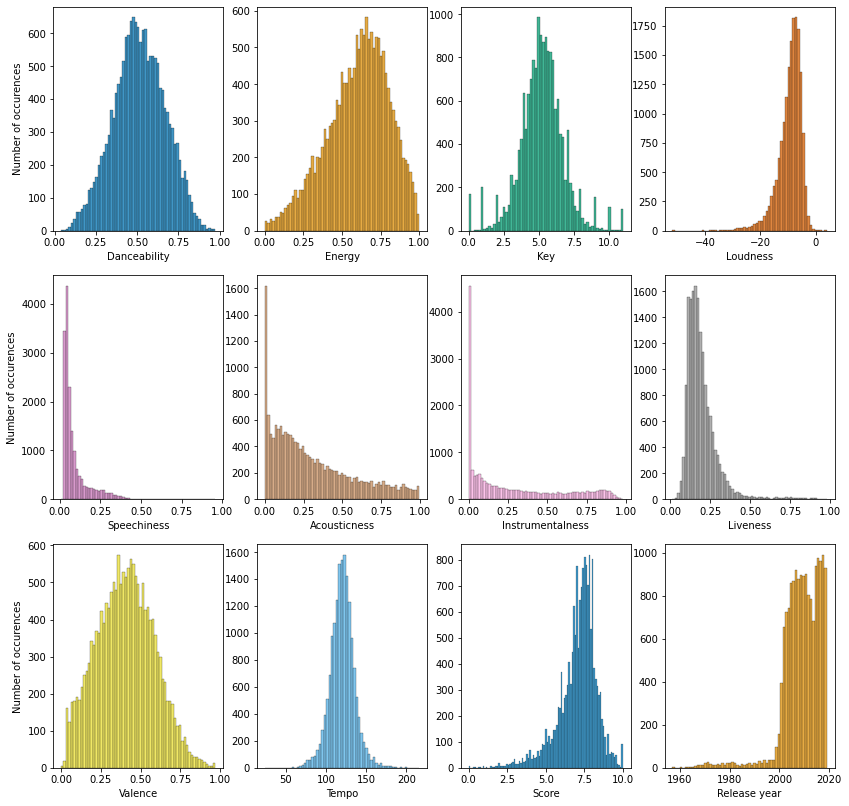

In [9]:
#Plot the distribution of the 12 numerical columns
fig, axs = plt.subplots(nrows = 3, ncols = 4, sharex=False)
palette = sns.color_palette(palette='colorblind',n_colors=12)
fig.set_size_inches(14, 14)

sns.histplot(data=data_cleaned, x="danceability", color=palette[0], bins=63, ax = axs[0,0])
sns.histplot(data=data_cleaned, x="energy", color=palette[1], bins=63, ax = axs[0,1])
sns.histplot(data=data_cleaned, x="key", color=palette[2], bins=63, ax = axs[0,2])
sns.histplot(data=data_cleaned, x="loudness", color=palette[3], bins=63, ax = axs[0,3])

sns.histplot(data=data_cleaned, x="speechiness", color=palette[4], bins=63, ax = axs[1,0])
sns.histplot(data=data_cleaned, x="acousticness", color=palette[5], bins=63, ax = axs[1,1])
sns.histplot(data=data_cleaned, x="instrumentalness", color=palette[6], bins=63, ax = axs[1,2])
sns.histplot(data=data_cleaned, x="liveness", color=palette[7], bins=63, ax = axs[1,3])

sns.histplot(data=data_cleaned, x="valence", color=palette[8], bins=63, ax = axs[2,0])
sns.histplot(data=data_cleaned, x="tempo", color=palette[9], bins=63, ax = axs[2,1])
sns.histplot(data=data_cleaned, x="score", color=palette[10], bins=len(data_cleaned.score.unique()), ax = axs[2,2])
sns.histplot(data=data_cleaned, x="releaseyear", color=palette[11], bins=63, ax = axs[2,3])

axs[0,0].set(xlabel="Danceability", ylabel= "Number of occurences")
axs[0,1].set(xlabel="Energy", ylabel= None)
axs[0,2].set(xlabel="Key", ylabel= None)
axs[0,3].set(xlabel="Loudness", ylabel= None)

axs[1,0].set(xlabel="Speechiness", ylabel= "Number of occurences")
axs[1,1].set(xlabel="Acousticness", ylabel= None)
axs[1,2].set(xlabel="Instrumentalness", ylabel= None)
axs[1,3].set(xlabel="Liveness", ylabel= None)

axs[2,0].set(xlabel="Valence", ylabel= "Number of occurences")
axs[2,1].set(xlabel="Tempo", ylabel= None)
axs[2,2].set(xlabel='Score', ylabel= None)
_ = axs[2,3].set(xlabel='Release year', ylabel= None)

**Task 1 Question 4**


In [10]:
#print the number of different values in the categorical columns 
data_catego = data_cleaned.loc[:,data_cleaned.dtypes == object]

print("We have {} categorical columns in our dataset :\n".format(len(data_catego.columns)))
for column in data_catego.columns :
  nbr_of_category = data_catego[column].nunique()
  if nbr_of_category <= 10 : 
    print("\033[1m{}\033[0m has {} different categories. They are : {} \n".format(column, nbr_of_category, data_catego[column].unique()))
  else :
    print("\033[1m{}\033[0m has {} different categories.".format(column,nbr_of_category))

We have 6 categorical columns in our dataset :

artist has 7890 different categories.
album has 16176 different categories.
reviewauthor has 554 different categories.
reviewdate has 4876 different categories.
recordlabel has 3030 different categories.
genre has 10 different categories. They are : ['Electronic' 'Folk/Country' 'Rock' 'Rap' 'Global' 'Experimental' 'Metal'
 'Pop/R&B' 'Jazz' 'none'] 



In [11]:
#Replace 'none' and NaN by 'Other' in the column genre 
if data_cleaned.genre.isnull().values.any() == False :
  print("There are no values NaN in the column 'genre'. \n")
else : print("Replace 'NaN' by 'Other!' in column 'genre'. \n")

data_cleaned['genre'] = np.where((data_cleaned['genre'] == 'none' ),
                           'Other',      
                           data_cleaned['genre'])    

print("The new {} categories of \033[1mgenre\033[0m are : {}".format(data_cleaned.genre.nunique(), data_cleaned.genre.unique()))

There are no values NaN in the column 'genre'. 

The new 10 categories of genre are : ['Electronic' 'Folk/Country' 'Rock' 'Rap' 'Global' 'Experimental' 'Metal'
 'Pop/R&B' 'Jazz' 'Other']


**Task 1 Question 5**

The three points are :  

*  **Favoritism**: as mentionned on the wikipedia page : "the website's journalism favored independent music, favoring lo-fi and often obscure indie rock and giving only cursory treatment to other genres". Scores should be unbiased with respect to the genre of the album. 
* **Dependent on the reviewer**: the score should be an objective evalutation of the album. However, there were critics saying that the Pitchfork reviews were "strongly dependent on which reviewer was writing". The reviewer might have a personal relationship to the artist, or they have been bribed.
*  **Imbalanced dataset**: Less than 5% of our data come from a range that represents 70% of our timeline (1957-2000). It is an issue if we compare values by year, or try to highlight tendencies with respect to time. There are way more albums published in modern years since nowadays publishing your music is more accessible. This means that we probably have more average artists that appear today than in the 70s and 80s which could affect how a model is fitted to the data. 






#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

**Task 2 Question 1**

In [12]:
# Create columns one hot-encode for all the different genres in column genre
data_task2 = data_cleaned.copy()

def onehot_encoding(dataframe, column_name):
  unique_values = dataframe[column_name].unique()
  for unique_value in unique_values : 
    dataframe[unique_value + '_onehot'] = np.where(dataframe[column_name] == unique_value, 1, 0)
  return dataframe

data_task2 = onehot_encoding(data_task2, "genre")

In [13]:
data_task2.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Electronic_onehot,Folk/Country_onehot,Rock_onehot,Rap_onehot,Global_onehot,Experimental_onehot,Metal_onehot,Pop/R&B_onehot,Jazz_onehot,Other_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,0,1,0,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200,0,0,1,0,0,0,0,0,0,0
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,0,0,0,1,0,0,0,0,0,0


**Task 2 Question 2**

In [14]:
#function returns an array of size (rows of dataframe df * number of elements in list of columns cols)
def numpy_helper(df, cols):
  return df[cols].to_numpy()

**Task 2 Question 3**



In [15]:
#create our array "array_genre_onehot" whith size (number of albums * 11)
genres = data_task2['genre'].unique()
genres_onehot = [genre + '_onehot' for genre in genres]

array_genre_onehot_score = numpy_helper(data_task2, genres_onehot +["score"])
print("The array 'array_genre_onehot_score' is of size {}.  \n".format(array_genre_onehot_score.shape))

#we use the function train_test_split from sklearn.model_selection
y = array_genre_onehot_score[:,-1]
X = array_genre_onehot_score[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
print("The train array 'X_train' has {}% of the rows of our original dataset. The training label 'score' has a mean of {} and a std of {}.".format(100*X_train.shape[0]/array_genre_onehot_score.shape[0],round(np.mean(y_train),3),round(np.std(y_train),3)))
print("The test array 'X_test' has {}% of the rows of our original dataset. The testing label 'score' has a mean of {} and a std of {}.".format(100*X_test.shape[0]/array_genre_onehot_score.shape[0],round(np.mean(y_test),3),round(np.std(y_test),3)))

The array 'array_genre_onehot_score' is of size (16730, 11).  

The train array 'X_train' has 70.0% of the rows of our original dataset. The training label 'score' has a mean of 7.05 and a std of 1.237.
The test array 'X_test' has 30.0% of the rows of our original dataset. The testing label 'score' has a mean of 7.046 and a std of 1.271.


**Task 2 Question 4**


In [ ]:
#TRAINING STAGE 
def Error(x,y,w,b):
    error = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return error

def training(x, y, w, b, learning_rate, epochs):
    
    print(" --------- Start training for {} epochs --------- ".format(epochs))

    for epoch in range(epochs):

        prediction = x.dot(w) + b
        diff = prediction - y
        
        #Computation of the weights and bias gradient
        weight_gradient = x.T.dot(diff) / len(y)
        bias_gradient = np.sum(diff) / len(y)
        
        #Update of the weights and bias
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        error = Error(x, y, w, b)
        
        if (epoch%(epochs/10)==0):
            print("For epoch number {}/{}, the lost is : {}".format(epoch, epochs, error))
      
    print(" --------------- Finish training  --------------- \n")
    print("The \033[1mweights\033[0m w are : {}".format(w))
    print("The \033[1mbias\033[0m b is : {}".format(b))
        
    return w, b

#initiaization 
w_0 = np.zeros(X_train.shape[1])
b_0 = 0

weights, bias = training(X_train, y_train, w_0 , b_0, learning_rate = 0.05, epochs= 200000)

 --------- Start training for 200000 epochs --------- 
For epoch number 0/200000, the lost is : 22.647815400664214
For epoch number 20000/200000, the lost is : 0.7533086089968996
For epoch number 40000/200000, the lost is : 0.7532786739675971
For epoch number 60000/200000, the lost is : 0.75326696061958
For epoch number 80000/200000, the lost is : 0.7532623772759011
For epoch number 100000/200000, the lost is : 0.7532605838485009
For epoch number 120000/200000, the lost is : 0.7532598820940474
For epoch number 140000/200000, the lost is : 0.7532596075028857
For epoch number 160000/200000, the lost is : 0.7532595000574599
For epoch number 180000/200000, the lost is : 0.7532594580148849
 --------------- Finish training  --------------- 

The weights w are : [0.42588165 0.72587    0.46896688 0.38071586 0.88434263 0.8420699
 0.57137993 0.48645918 1.04520435 0.70103747]
The bias b is : 6.531927858648472


In [ ]:
#Solution of our training 
solution_training = list(zip(genres,weights))
solution_training.sort(key=lambda x:x[1], reverse=True)

print("The genres are printed by decreasing weights : \n")
for (name, weight) in solution_training : 
  print("\033[1m{}\033[0m has a weight of {}. Its average score is : \033[1m{}\033[0m.".format(name, round(weight, 3), round(weight+bias, 3))) 

print("\nOur model is predicting that a \033[1mJazz\033[0m album is more likely to have a better score than a \033[1mRap\033[0m album.")

The genres are printed by decreasing weights : 

Jazz has a weight of 1.045. Its average score is : 7.577.
Global has a weight of 0.884. Its average score is : 7.416.
Experimental has a weight of 0.842. Its average score is : 7.374.
Folk/Country has a weight of 0.726. Its average score is : 7.258.
Other has a weight of 0.701. Its average score is : 7.233.
Metal has a weight of 0.571. Its average score is : 7.103.
Pop/R&B has a weight of 0.486. Its average score is : 7.018.
Rock has a weight of 0.469. Its average score is : 7.001.
Electronic has a weight of 0.426. Its average score is : 6.958.
Rap has a weight of 0.381. Its average score is : 6.913.

Our model is predicting that a Jazz album is more likely to have a better score than a Rap album.


We obviously did not take the easy path. Because we have a categorical variable as the only feature, when given a test sample belonging to a genre, the best that the model could do is to output the mean of the train set for this specific genre. We can check that our model is working by looking at the relative absolute error between our predictions and the average score per genre in the train set. As we can see, we are very close to 0% : 



In [ ]:
#Proof that our model is working 
class_labels = np.argmax(X_train, axis=1)
solution = weights + bias 
data_visualize_train = pd.DataFrame({'Genre':class_labels,'Average_score_train_set':y_train})
data_visualize_train['Genre'] = data_visualize_train['Genre'].apply(lambda x: genres[x])
data_visualize_train = data_visualize_train.groupby('Genre', as_index=False).mean()
data_visualize_train = data_visualize_train.sort_values(by=['Average_score_train_set'],ascending=False)

data_visualize_prediction = pd.DataFrame({'Genre':genres,'Predicted_score_train_set':solution})

result = pd.merge(data_visualize_train, data_visualize_prediction, on='Genre', how='outer')
result['Relative_absolute_error_%']= 100*abs(result['Average_score_train_set']-result['Predicted_score_train_set'])/result['Predicted_score_train_set']
result

,Genre,Average_score_train_set,Predicted_score_train_set,Relative_absolute_error_%
0,Jazz,7.577114,7.577132,0.000235
1,Global,7.416239,7.416270,0.000420
2,Experimental,7.373995,7.373998,0.000042
3,Folk/Country,7.257791,7.257798,0.000096
4,Other,7.240000,7.232965,0.097258
5,Metal,7.103301,7.103308,0.000096
6,Pop/R&B,7.018383,7.018387,0.000055
7,Rock,7.000894,7.000895,0.000011
8,Electronic,6.957808,6.957810,0.000020
9,Rap,6.912641,6.912644,0.000044


In [ ]:
#PREDICTING STAGE
def predict(X, w, b):
    return X.dot(w) + b

def absolute_error(y, y_pred):
  return abs(y - y_pred) 

# Predict and get error
y_pred = predict(X_test, weights, bias)
abs_error = absolute_error(y_test, y_pred)
average_abs_error = round(np.sum(abs_error)/ len(y_pred), 3) 
mse_task2 = round(np.sum(np.power(y_test - y_pred,2))/len(y_pred),3)

print("For {} of test samples, we have in average an error of {}. \n".format(len(y_test),average_abs_error))

# From predictions get class labels
class_labels = np.argmax(X_test, axis=1)
data_prediction = pd.DataFrame({'Genre':class_labels,'Average_score_test_set':y_test,'Average_score_prediction_test_set':y_pred ,'Average_absolute_error_score_test_set':abs_error})
data_prediction['Genre'] = data_prediction['Genre'].apply(lambda x: genres[x])

# Get mean for each genre
data_prediction.groupby('Genre').mean()

For 5019 of test samples, we have in average an error of 0.919. 



,Average_score_test_set,Average_score_prediction_test_set,Average_absolute_error_score_test_set
Genre,,,
Electronic,6.935574,6.957810,0.973566
Experimental,7.360886,7.373998,0.749746
Folk/Country,7.113216,7.257798,0.761888
Global,7.361364,7.416270,0.691703
Jazz,7.683117,7.577132,0.741674
Metal,7.067782,7.103308,0.868858
Other,7.533333,7.232965,0.511356
Pop/R&B,6.896850,7.018387,0.925619
Rap,7.059912,6.912644,0.911201


**Task 2 Question 5**


In [ ]:
R_2_task2 = r2_score(y_test,y_pred)
print("The R_2 score of our regression is {}. Wich means that {}% of the data fit the regression model, which is quite poor.".format(round(R_2_task2,5),int(R_2_task2*100))) 

The R_2 score of our regression is 0.01135. Wich means that 1% of the data fit the regression model, which is quite poor.


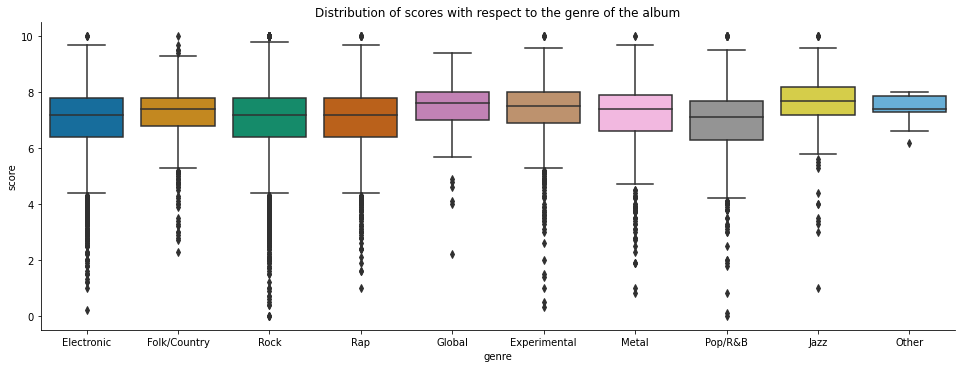

In [ ]:
#Visualize the distribution of scores w.r.t. to the genre 
plot = sns.catplot(x="genre", y="score", kind="box", data=data_task2,palette='colorblind').set(title='Distribution of scores with respect to the genre of the album')
plot.fig.set_figwidth(15)
plot.fig.set_figheight(5)

The boxplot shows what the R_2 score is telling us : the variable "genre" is not a good predictor of the variable score. We can see that for each genre the standard deviation is high which results in a bad prediction (the values are not close enough to the mean). 

**Task 2 Question 5**


The outcome (album score) needs to have the similar distribution in the train and test sets. Splitting the dataset randomly in 70/30, or any other ratio, does not guarantee that we have this. Looking at the boxplot above, one can see that the majority of the samples have a score between 6 and 8. Thus when we take a 70/30 split most of our samples will lie in the 6-8 rate. Then we lose information about some of the 1-6 and 8-10 cases that can be important for making a good prediction. In the training set a representation of the entire range of scores needs to exists in order to accurately predict an outcome on the entire range of scores.

**In summary**:
Uniform subsampling from population leads to fewer data about minorities, which in our case are the albums with a score higher than 8 or lower than 4. There is a chance we select no minority datapoints which is a problem.



**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

**Task 3 Question 1**


In [ ]:
# Get data
data_task3 = data_task2.copy()

new_features = ["releaseyear", "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]
allfeatures = new_features + genres_onehot + ["score"]

array_allfeatures_and_score = numpy_helper(data_task2, allfeatures)
print("The array 'array_allfeatures_and_score' is of size {} -> (21 features to predict the variable 'score')\n".format(array_allfeatures_and_score.shape))

# Split data : random split
y = array_allfeatures_and_score[:,-1]
X = array_allfeatures_and_score[:,:-1]
X_train_ran, X_test_ran, y_train_ran, y_test_ran = train_test_split(X, y, test_size=0.30, random_state=123)

print("\033[1mRandom split :\033[0m\nThe train array 'X_train_ran' has {}% of the rows of our original dataset. The training label 'score' has a mean of {} and a std of {}.".format(100*X_train_ran.shape[0]/array_allfeatures_and_score.shape[0],round(np.mean(y_train_ran),3),round(np.std(y_train_ran),3)))
print("The test array 'X_test_ran' has {}% of the rows of our original dataset. The testing label 'score' has a mean of {} and a std of {}.".format(100*X_test_ran.shape[0]/array_allfeatures_and_score.shape[0],round(np.mean(y_test_ran),3),round(np.std(y_test_ran),3)))

The array 'array_allfeatures_and_score' is of size (16730, 22) -> (21 features to predict the variable 'score')

Random split :
The train array 'X_train_ran' has 70.0% of the rows of our original dataset. The training label 'score' has a mean of 7.05 and a std of 1.237.
The test array 'X_test_ran' has 30.0% of the rows of our original dataset. The testing label 'score' has a mean of 7.046 and a std of 1.271.


In [ ]:
# Train linear regression model with sklearn (Least Squares)
model = LinearRegression()
model.fit(X_train_ran,y_train_ran)

# Inference w. test data on trained model, calculate R_squared.
pred_task3_1 = model.predict(X_test_ran)
mse_task3_1 = np.sum(np.power(pred_task3_1 - y_test_ran,2))/len(y_test_ran) 
R2_task3_1 = r2_score(y_test_ran, pred_task3_1)

print("Predicting the album score using a 70/30 train/test split gave:\nMSE = {}, R2 = {}".format(round(mse_task3_1,4),round(R2_task3_1,4)))

Predicting the album score using a 70/30 train/test split gave:
MSE = 1.5527, R2 = 0.0387


As expected, our R2 score increased compared to Task 1 Question 5. By adding more variables to our predictor, we are capable of explaining a bigger portion of the variation of the variable score. 

**Task 3 Question 2**


In [ ]:
#data preprocessing
data_task3_2 = data_task3.copy()

data_task3_2_2000 = data_task3_2.loc[data_task3_2['releaseyear'] < 2000] #before year 2000 (2000 is not included)
data_task3_2_2003 = data_task3_2.loc[data_task3_2['releaseyear'] > 2002] #from year 2003 (2003 is included)

array_allfeatures_and_score_2000 = numpy_helper(data_task3_2_2000, allfeatures)
array_allfeatures_and_score_2003 = numpy_helper(data_task3_2_2003, allfeatures)

# Split data : longitudinal split 
y_train_long = array_allfeatures_and_score_2000[:,-1]
X_train_long = array_allfeatures_and_score_2000[:,:-1]

y_test_long = array_allfeatures_and_score_2003[:,-1]
X_test_long = array_allfeatures_and_score_2003[:,:-1]

train_percentage = 100*X_train_long.shape[0]/(X_train_long.shape[0]+X_test_long.shape[0])
test_percentage = 100*X_test_long.shape[0]/(X_train_long.shape[0]+X_test_long.shape[0])

print("\033[1mLongitudinal split :\033[0m\nThe train array 'X_train_long' has {}% of the rows of our original dataset. The training label 'score' has a mean of {} and a std of {}.".format(round(train_percentage,3),round(np.mean(y_train_long),3),round(np.std(y_train_long),3)))
print("The test array 'X_test_long' has {}% of the rows of our original dataset. The testing label 'score' has a mean of {} and a std of {}.".format(round(test_percentage,3),round(np.mean(y_test_long),3),round(np.std(y_test_long),3)))

Longitudinal split :
The train array 'X_train_long' has 5.012% of the rows of our original dataset. The training label 'score' has a mean of 8.287 and a std of 1.205.
The test array 'X_test_long' has 94.988% of the rows of our original dataset. The testing label 'score' has a mean of 6.993 and a std of 1.174.


In [ ]:
#train and test
model2= LinearRegression()
model2.fit(X_train_long,y_train_long)
pred_task3_2 = model2.predict(X_test_long)

#report scores
mse_task3_2 = np.sum(np.power(pred_task3_2 - y_test_long,2))/len(y_test_long)
R2_task3_2 = r2_score(y_test_long, pred_task3_2)
print("Predicting the album score using before2000/after2003 train/test split gave:\nMSE = {}, R2 = {}".format(round(mse_task3_2,4),round(R2_task3_2,4)))

Predicting the album score using before2000/after2003 train/test split gave:
MSE = 1.7683, R2 = -0.2823


**Task 3 Question 2 Discussion**


We have a negative R2. This means that our model does not follow the trend of the data and fits the data worse than a horizontal line.

It is a poor method to train a model on data that has different characteristics than the data we are trying to predict. In particular in this case we observe:
- The score distribution is completely different before 2000 and after 2003, and it has a higher mean.
- The feature distribution is the same before 2000 and after 2003, that's why even if we are evaluating the model on data after 2003 we're still getting the avarage score as result.
We get a lower R2 since in this case the avarage of predictions is higher than the avarage score of all data.

We have seen in Task 1, that the scores before 2000 are in average higher than the scores after 2003 and decrease linearly with respect to time. After 2000, the score seems invariant of the year. That's why fitting a model on years 1957 to 2003 will give that release year is a good predictor, whereas for years 2003 and forward it is not.





**Task 3 Question 3**


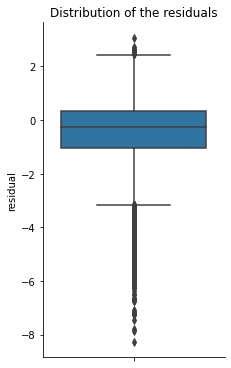

In [ ]:
# plot the distribution of residuals
residual = y_test_long - pred_task3_2
residual_df = pd.DataFrame(residual,columns=['residual'])
plot = sns.catplot(y="residual", kind="box", data=residual_df).set(title='Distribution of the residuals')
plot.fig.set_figwidth(3)
plot.fig.set_figheight(5)

We can see that more than 50% of our residuals are negative, which means that our model tends to overpredict the score. 

In [ ]:
# bootstrapped confidence intervals
def bootstrap(data,num_repeat,bs_size):
    bs_prob=[]
    for i in range(num_repeat):
        #randomly select the samples with replacement
        bs_sample = np.random.choice(data,size=bs_size)
        count=0
        for j in range(bs_size):
          if abs(bs_sample[j]) > 2:
            count += 1
        prob = count/len(bs_sample)
        bs_prob.append(prob)
    
    return bs_prob

bootstrapped = bootstrap(residual,30000,3000)

The probability that our prediction is off by more than 2-points lies at 95% in this 
confidence interval : [0.0983 - 0.1203].


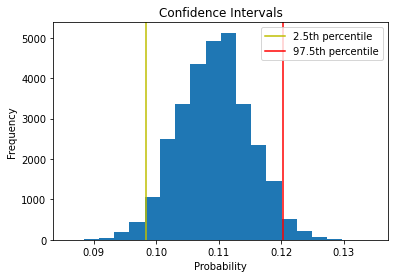

In [ ]:
# Plot the PDF for bootstrap results using histogram
plt.hist(bootstrapped,bins=20)

x_025 = np.percentile(bootstrapped,[2.5])
x_975 =np.percentile(bootstrapped,[97.5])

plt.axvline(x=x_025, ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=x_975, ymin=0, ymax=1,label='97.5th percentile',c='r')

print("The probability that our prediction is off by more than 2-points lies at 95% in this \nconfidence interval : [{} - {}].".format(round(x_025[0],4),round(x_975[0],4)))

plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Confidence Intervals")
plt.legend()
plt.show()

**Task 3 Question 4**


In [ ]:
# Define, train and test the GBR model
GBRmodel = GradientBoostingRegressor()
GBRmodel.fit(X_train_long,y_train_long)
pred_task3_3 = GBRmodel.predict(X_test_long)

# Report R^2 and mse
R2_task3_3 = r2_score(y_test_long, pred_task3_3)
mse_task3_3 = np.sum(np.power(y_test_long - pred_task3_3,2))/len(y_test_long)

print("Predicting the album with a Gradient boosting regressor using before2000/after2003 train/test split gave:\nMSE = {}, R2 = {}".format(round(mse_task3_3,4),round(R2_task3_3,4)))

Predicting the album with a Gradient boosting regressor using before2000/after2003 train/test split gave:
MSE = 1.9013, R2 = -0.3787


**Task 3 Question 5** 



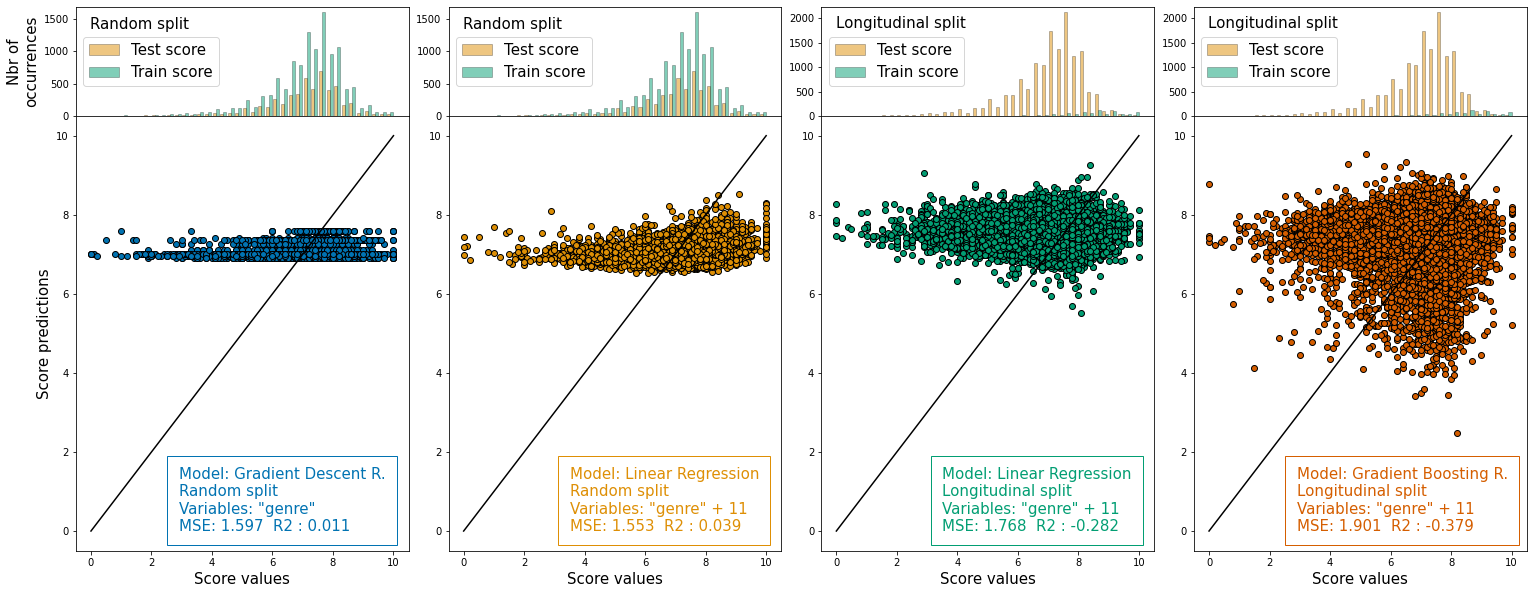

In [ ]:
# Figure : visualize what we have done so far 
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(26)
spec = gridspec.GridSpec(ncols=4, nrows=2,wspace=0.12,hspace=0, height_ratios=[1,4])
palette = sns.color_palette(palette='colorblind',n_colors=6)

#FIRST ROW 
ax00 = fig.add_subplot(spec[0])
ax01 = fig.add_subplot(spec[1])
ax02 = fig.add_subplot(spec[2])
ax03 = fig.add_subplot(spec[3])

_ = ax00.hist([y_test, y_train], bins=40,alpha=0.5, label=['Test score', 'Train score'], color=[palette[1],palette[2]],lw=0.5, edgecolor="black")
_ = ax01.hist([y_test_ran, y_train_ran], bins=40,alpha=0.5, label=['Test score', 'Train score'], color=[palette[1],palette[2]],lw=0.5, edgecolor="black")
_ = ax02.hist([y_test_long, y_train_long], bins=40,alpha=0.5, label=['Test score', 'Train score'], color=[palette[1],palette[2]],lw=0.5, edgecolor="black")
_ = ax03.hist([y_test_long, y_train_long], bins=40,alpha=0.5, label=['Test score', 'Train score'], color=[palette[1],palette[2]],lw=0.5, edgecolor="black")

ax00.legend(loc='center left',fontsize=15)
ax01.legend(loc='center left',fontsize=15)
ax02.legend(loc='center left',fontsize=15)
ax03.legend(loc='center left',fontsize=15)

_ = ax00.annotate('Random split',(0,1350), color="black",size=15)
_ = ax01.annotate('Random split',(0,1350), color="black",size=15)
_ = ax02.annotate('Longitudinal split',(0,1800), color="black",size=15)
_ = ax03.annotate('Longitudinal split',(0,1800), color="black",size=15)

ax00.get_xaxis().set_visible(False)
ax01.get_xaxis().set_visible(False)
ax02.get_xaxis().set_visible(False)
ax03.get_xaxis().set_visible(False)
ax00.set_ylabel('Nbr of\noccurrences', fontsize=15) 

#SECOND ROW
ax10 = fig.add_subplot(spec[4])
ax11 = fig.add_subplot(spec[5])
ax12 = fig.add_subplot(spec[6])
ax13 = fig.add_subplot(spec[7])

_ = ax10.scatter(y_test, y_pred, edgecolor="black",color=palette[0])
_ = ax11.scatter(y_test_ran, pred_task3_1, edgecolor="black",color=palette[1])
_ = ax12.scatter(y_test_long, pred_task3_2,edgecolor="black",color=palette[2])
_ = ax13.scatter(y_test_long, pred_task3_3,edgecolor="black",color=palette[3])

ax10.plot([0,10],[0,10],color="black")
ax11.plot([0,10],[0,10],color="black")
ax12.plot([0,10],[0,10],color="black")
ax13.plot([0,10],[0,10],color="black")


_ = ax10.annotate('Model: Gradient Descent R.\nRandom split\nVariables: "genre" \nMSE: {}  R2 : {}'.format(round(mse_task2,3),round(R_2_task2,3)), 
             (2.9, 0), 
             color=palette[0],
             size=15,
             bbox=dict(boxstyle='square,pad=0.75',facecolor='none', edgecolor=palette[0]))

_ = ax11.annotate('Model: Linear Regression\nRandom split\nVariables: "genre" + 11\nMSE: {}  R2 : {}'.format(round(mse_task3_1,3),round(R2_task3_1,3)), 
             (3.5, 0), 
             color=palette[1],
             size=15,
             bbox=dict(boxstyle='square,pad=0.75',facecolor='none', edgecolor=palette[1]))

_ = ax12.annotate('Model: Linear Regression\nLongitudinal split\nVariables: "genre" + 11\nMSE: {}  R2 : {}'.format(round(mse_task3_2,3),round(R2_task3_2,3)), 
             (3.5, 0), 
             color=palette[2],
             size=15,
             bbox=dict(boxstyle='square,pad=0.75',facecolor='none', edgecolor=palette[2]))

_ = ax13.annotate('Model: Gradient Boosting R.\nLongitudinal split\nVariables: "genre" + 11\nMSE: {}  R2 : {}'.format(round(mse_task3_3,3),round(R2_task3_3,3)), 
             (2.9, 0), 
             color=palette[3],
             size= 15,
             bbox=dict(boxstyle='square,pad=0.75',facecolor='none', edgecolor=palette[3]))


ax10.set_xlabel('Score values', fontsize=15)
ax11.set_xlabel('Score values', fontsize=15)
ax12.set_xlabel('Score values', fontsize=15)
ax13.set_xlabel('Score values', fontsize=15)
_=ax10.set_ylabel('Score predictions', fontsize=15) 

Above, is a plot summarizing our 4 models. From left to right we have : 
- model task 2.4 : gradient descent regressor, with a random split and using only the variable 'genre' as a feature. 
- model task 3.1 : linear regression, with a random split and using the variable 'genre' plus the 11 numerical variables as features. 
- model task 3.2 : linear regression, with a longitudinal split and using the variable 'genre' plus the 11 numerical variables as features.
- model task 3.4 : gradient boosting regressor, with a longitudinal split and using the variable 'genre' plus the 11 numerical variables as features.

The structure of the plot is as follows : 
- Each column represents a model.
-  At the top of each column (first row), we have the distribution of the scores for the training and the testing set. We can see the difference between the random split and the longitudinal split. The y-axis represents the number of occurrences, and the x-axis the score value of the sample. 
- The second row represents the accuracy of each model on the test set. Each dot represents a sample in the test set. The x-axis represents its real score value, and the y-axis represents the prediction of the model. 
- The first and second row share the same x-axis. 
- If a model is predicting with a low error, all the points will be on the black axis (y=x).



The plots give us the following information for model 3.2 and 3.4 :
- The linear regressor is able to accurately predict the scores between 6 and 8.
- The linear regressor is unable to accurately predict scores that are lower than 6. As it has been trained on a data set with a mean of 8 and a small std, it is not able to predict values outside the train distribution. 
- The linear regressor always predict a value between the boundaries of the train distribution. 
- Gradient boosting is worse compared to the linear regressor when trying to predict the scores between 6 and 8. The variation of the predictions is higher. 
- Gradient boosting also overpredicts scores lower than 6.



The Gradient Boosting Regressor (GBR) performs worse in terms or R^2, it has a R^2 of -0.4 while the linear regressor (LR) has an R^2 of -0.2. However visually one can convey that the bias is lower for the GBR. Looking at the plot above, the predictions for the GBR are more centered around the line  y = x which is what is wanted. For the LR the predictions are almost constant with respect to x (y = C). We have a trade off: Bias (LR) vs variance (GBR).



The Gradient Boosting Regressor train in stages and takes feedback from its predictions after every stage. The errors are used to boost the training in the next stage to tune the model into correctly predicting the cases with errors next time. The linear model trains in one stage and does not take into account its errors except for its loss function. For the linear model the minority scores have a very low weight for the model, for the Gradient Boosting Regressors these get a higher weight for every stage and the model ends up better bias-wise.



**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

**Task 4 Question 1** 


In [16]:
data_4_1 = data_cleaned.copy()

# Remove album where artist did only one album 
data_4_1 =  data_4_1[data_4_1.artist.duplicated(keep=False)]

# Create total_nbr_of_albums (total album done by artist) and nbr_of_album (latest album in decreasing order : 1/3 -> oldest album out of three)
data_4_1['total_nbr_of_albums'] = data_4_1['artist'].map(data_4_1['artist'].value_counts())
data_4_1 = data_4_1.sort_values(by=['artist', 'releaseyear','reviewdate'])
data_4_1['nbr_of_album'] = (data_4_1.groupby('artist').cumcount() + 1).astype(str) + "/" + data_4_1['total_nbr_of_albums'].astype(str)
data_4_1 = onehot_encoding(data_4_1, "genre")

data_4_1.head(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_nbr_of_albums,nbr_of_album,Rock_onehot,Rap_onehot,Experimental_onehot,Electronic_onehot,Pop/R&B_onehot,Folk/Country_onehot,Metal_onehot,Jazz_onehot,Global_onehot,Other_onehot
7411,!!!,Split EP,Dominique Leone,6.0,1999,February 12 2004,GSL,Rock,0.470000,0.909500,6.000000,-4.112000,0.095600,0.000449,0.000000,0.177500,0.596500,97.046500,8,1/8,1,0,0,0,0,0,0,0,0,0
6891,!!!,Louden Up Now,Nick Sylvester,7.0,2004,June 7 2004,Touch and Go,Rock,0.808273,0.751636,6.818182,-7.082636,0.080591,0.116632,0.400204,0.159191,0.692364,119.974091,8,2/8,1,0,0,0,0,0,0,0,0,0
10517,!!!,Myth Takes,Brian Howe,8.0,2007,March 2 2007,Warp,Rock,0.646500,0.831800,5.400000,-6.939000,0.069290,0.091973,0.254866,0.233740,0.561200,116.136200,8,3/8,1,0,0,0,0,0,0,0,0,0
10053,!!!,"Strange Weather, Isn't It?",Larry Fitzmaurice,6.9,2010,August 20 2010,Warp,Rock,0.711889,0.881778,4.555556,-6.234556,0.047756,0.050500,0.236144,0.241333,0.763889,117.525000,8,4/8,1,0,0,0,0,0,0,0,0,0
2397,!!!,Thr!!!er,Brian Howe,6.0,2013,April 30 2013,Warp,Rock,0.778222,0.798444,5.666667,-6.810778,0.060756,0.032423,0.076008,0.161244,0.808111,117.911111,8,5/8,1,0,0,0,0,0,0,0,0,0


In [17]:
def mean_previous(df, Category, Order, exception, Var):
    # Order the dataframe first 
    df.sort_values([Category, Order, exception], inplace=True)

    # Calculate the ordinary grouped cumulative sum 
    # and then substract with the grouped cumulative sum of the last order
    csp = df.groupby([Category])[Var].cumsum() - df.groupby([Category, Order,exception])[Var].cumsum()

    # Calculate the ordinary grouped cumulative count 
    # and then substract with the grouped cumulative count of the last order
    ccp = df.groupby([Category])[Var].cumcount() - df.groupby([Category, Order,exception]).cumcount()

    return csp / ccp

numerical_columns = ["score", "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]

# Mean of the previous rows in each group 
for column in numerical_columns : 
  data_4_1[column + '_previous'] = mean_previous(data_4_1, 'artist', 'releaseyear','reviewdate', column)

data_4_1.head(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_nbr_of_albums,nbr_of_album,Rock_onehot,Rap_onehot,Experimental_onehot,Electronic_onehot,Pop/R&B_onehot,Folk/Country_onehot,Metal_onehot,Jazz_onehot,Global_onehot,Other_onehot,score_previous,key_previous,acousticness_previous,danceability_previous,energy_previous,instrumentalness_previous,liveness_previous,loudness_previous,speechiness_previous,valence_previous,tempo_previous
7411,!!!,Split EP,Dominique Leone,6.0,1999,February 12 2004,GSL,Rock,0.470000,0.909500,6.000000,-4.112000,0.095600,0.000449,0.000000,0.177500,0.596500,97.046500,8,1/8,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6891,!!!,Louden Up Now,Nick Sylvester,7.0,2004,June 7 2004,Touch and Go,Rock,0.808273,0.751636,6.818182,-7.082636,0.080591,0.116632,0.400204,0.159191,0.692364,119.974091,8,2/8,1,0,0,0,0,0,0,0,0,0,6.000,6.000000,0.000449,0.470000,0.909500,0.000000,0.177500,-4.112000,0.095600,0.596500,97.046500
10517,!!!,Myth Takes,Brian Howe,8.0,2007,March 2 2007,Warp,Rock,0.646500,0.831800,5.400000,-6.939000,0.069290,0.091973,0.254866,0.233740,0.561200,116.136200,8,3/8,1,0,0,0,0,0,0,0,0,0,6.500,6.409091,0.058540,0.639136,0.830568,0.200102,0.168345,-5.597318,0.088095,0.644432,108.510295
10053,!!!,"Strange Weather, Isn't It?",Larry Fitzmaurice,6.9,2010,August 20 2010,Warp,Rock,0.711889,0.881778,4.555556,-6.234556,0.047756,0.050500,0.236144,0.241333,0.763889,117.525000,8,4/8,1,0,0,0,0,0,0,0,0,0,7.000,6.072727,0.069684,0.641591,0.830979,0.218356,0.190144,-6.044545,0.081827,0.616688,111.052264
2397,!!!,Thr!!!er,Brian Howe,6.0,2013,April 30 2013,Warp,Rock,0.778222,0.798444,5.666667,-6.810778,0.060756,0.032423,0.076008,0.161244,0.808111,117.911111,8,5/8,1,0,0,0,0,0,0,0,0,0,6.975,5.693434,0.064888,0.659165,0.843679,0.222803,0.202941,-6.092048,0.073309,0.653488,112.670448


In [18]:
#keep only the latest album of each artist
data_4_1 = data_4_1.drop(data_4_1[data_4_1['total_nbr_of_albums'].astype(str) != data_4_1['nbr_of_album'].str[0]].index)
data_4_1.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,total_nbr_of_albums,nbr_of_album,Rock_onehot,Rap_onehot,Experimental_onehot,Electronic_onehot,Pop/R&B_onehot,Folk/Country_onehot,Metal_onehot,Jazz_onehot,Global_onehot,Other_onehot,score_previous,key_previous,acousticness_previous,danceability_previous,energy_previous,instrumentalness_previous,liveness_previous,loudness_previous,speechiness_previous,valence_previous,tempo_previous
16478,!!!,Wallop,Jesse Dorris,7.2,2019,September 7 2019,none,Rock,0.745643,0.737857,5.357143,-8.632500,0.127257,0.098557,0.176297,0.183271,0.529571,120.037500,8,8/8,1,0,0,0,0,0,0,0,0,0,6.871429,5.559668,0.069859,0.702481,0.817128,0.183817,0.192354,-6.456197,0.075978,0.682310,116.099069
16450,(Sandy) Alex G,House of Sugar,Anna Gaca,8.6,2019,September 16 2019,none,Rock,0.494308,0.639538,4.307692,-5.604154,0.033746,0.255131,0.289322,0.163469,0.421562,109.091385,2,2/2,1,0,0,0,0,0,0,0,0,0,8.400000,6.071429,0.283422,0.461143,0.588929,0.313242,0.222736,-7.042714,0.049843,0.462714,128.357714
16226,03 Greedo,Netflix & Deal,Sheldon Pearce,7.5,2019,December 5 2019,none,Rap,0.827077,0.543462,4.538462,-7.783154,0.244746,0.157731,0.000657,0.202308,0.567692,133.925385,4,4/4,0,1,0,0,0,0,0,0,0,0,7.866667,4.704545,0.136049,0.723779,0.529129,0.003679,0.171741,-7.953956,0.160465,0.345698,124.309811
12945,13 & God,Own Your Ghost,Brian Howe,6.0,2011,May 17 2011,Anticon,Experimental,0.654000,0.763300,5.300000,-7.146600,0.115490,0.244830,0.254159,0.244720,0.457200,120.444500,2,2/2,0,0,1,0,0,0,0,0,0,0,8.100000,4.500000,0.477700,0.626600,0.572700,0.433760,0.161650,-11.962400,0.064900,0.190610,119.176200
12924,13ghosts,The Strangest Colored Lights,Stephen M. Deusner,7.6,2008,May 5 2008,Skybucket,Rock,0.449769,0.381231,4.153846,-11.887077,0.033800,0.203038,0.135418,0.240800,0.162469,117.671077,2,2/2,1,0,0,0,0,0,0,0,0,0,7.800000,4.000000,0.026020,0.741833,0.403000,0.458300,0.224067,-18.364667,0.126133,0.572667,133.191500


In [19]:
data_4_1 = data_4_1.drop('nbr_of_album', 1)
data_4_1 = data_4_1.drop('total_nbr_of_albums', 1)
print("After task 4.1, our dataset has the following dimensions :",data_4_1.shape)
print("The columns are :",data_4_1.columns)

After task 4.1, our dataset has the following dimensions : (3461, 39)
The columns are : Index(['artist', 'album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate',
       'recordlabel', 'genre', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Rock_onehot', 'Rap_onehot', 'Experimental_onehot',
       'Electronic_onehot', 'Pop/R&B_onehot', 'Folk/Country_onehot',
       'Metal_onehot', 'Jazz_onehot', 'Global_onehot', 'Other_onehot',
       'score_previous', 'key_previous', 'acousticness_previous',
       'danceability_previous', 'energy_previous', 'instrumentalness_previous',
       'liveness_previous', 'loudness_previous', 'speechiness_previous',
       'valence_previous', 'tempo_previous'],
      dtype='object')


**Task 4 Question 2** 


In [20]:
data_4_2 = data_4_1.copy()

# Select only the numerical columns 
data_4_2 = data_4_2.select_dtypes(exclude=object)

label = data_4_2["score"]
label_np = label.to_numpy()

feature = data_4_2.drop(columns=['score'])
feature_np = feature.to_numpy()

# Split data : random split
label_np = label.to_numpy()
feature_np = feature.to_numpy()
X_train_task4_2, X_test_task4_2, y_train_task4_2, y_test_task4_2 = train_test_split(feature_np, label_np, test_size=0.30, random_state=123)

print("\033[1mRandom split :\033[0m\nThe train array 'X_train_task4_2' has {}% of the rows of our original dataset. The training label 'score' has a mean of {} and a std of {}.".format(round(100*X_train_task4_2.shape[0]/label_np.shape[0],3),round(np.mean(y_train_task4_2),3),round(np.std(y_train_task4_2),3)))
print("The test array 'X_test_task4_2' has {}% of the rows of our original dataset. The testing label 'score' has a mean of {} and a std of {}.".format(round(100*X_test_task4_2.shape[0]/label_np.shape[0],3),round(np.mean(y_test_task4_2),3),round(np.std(y_test_task4_2),3)))

Random split :
The train array 'X_train_task4_2' has 69.98% of the rows of our original dataset. The training label 'score' has a mean of 6.855 and a std of 1.163.
The test array 'X_test_task4_2' has 30.02% of the rows of our original dataset. The testing label 'score' has a mean of 6.891 and a std of 1.158.


In [ ]:
# Define, train and test the GBR model
GBR_4_2 = GradientBoostingRegressor()
GBR_4_2.fit(X_train_task4_2,y_train_task4_2)
pred_task4_2 = GBR_4_2.predict(X_test_task4_2)

# Report R^2 and mse
R2_task4_2 = r2_score(y_test_task4_2, pred_task4_2)
mse_task4_2 = np.sum(np.power(y_test_task4_2 - pred_task4_2,2))/len(y_test_task4_2)

print("Predicting the album with a Gradient boosting regressor using before2000/after2003 train/test split gave:\nMSE = {}, R2 = {}".format(round(mse_task4_2,4),round(R2_task4_2,4)))

Predicting the album with a Gradient boosting regressor using before2000/after2003 train/test split gave:
MSE = 1.09, R2 = 0.1874


Compared to the previous models in Task 2 and 3, we can see that the mean square has decreased and the R2 has increased significantly.

**Task 4 Question 3** 


In [ ]:
# Define the function for searching parameters
n_estimators = np.array([100,200,300,400])
learning_rate = np.array([0.1,0.05,0.01])

def tuning(feature_train, label_train, n_array, LR_array):
  # Cross-validation R2 scores of each scenario
  R2_array = np.empty([4,3,20])
  for i in range(n_array.shape[0]):
    for j in range(LR_array.shape[0]):
      model_tune = GradientBoostingRegressor(learning_rate = LR_array[j], n_estimators= n_array[i])
      model_tune.fit(feature_train, label_train)
      R2_array[i,j,:] = cross_val_score(model_tune, feature_train, label_train, cv=20, scoring='r2')

      # Z score for 90% Confidence Interval is 1.645, for reporting the R2 scores
      print("n_estimator: %d, learning rate: %0.2f ----> R2 score: %0.3f (+/- %0.3f)" % (n_array[i], LR_array[j], R2_array[i,j,:].mean(), R2_array[i,j,:].std() * 1.645))

  return R2_array

In [ ]:
# Obtain cross validation scores for each scenario
R2_scores = tuning(X_train_task4_2, y_train_task4_2, n_estimators, learning_rate)

n_estimator: 100, learning rate: 0.10 ----> R2 score: 0.172 (+/- 0.147)
n_estimator: 100, learning rate: 0.05 ----> R2 score: 0.186 (+/- 0.122)
n_estimator: 100, learning rate: 0.01 ----> R2 score: 0.158 (+/- 0.055)
n_estimator: 200, learning rate: 0.10 ----> R2 score: 0.150 (+/- 0.158)
n_estimator: 200, learning rate: 0.05 ----> R2 score: 0.173 (+/- 0.142)
n_estimator: 200, learning rate: 0.01 ----> R2 score: 0.184 (+/- 0.087)
n_estimator: 300, learning rate: 0.10 ----> R2 score: 0.127 (+/- 0.179)
n_estimator: 300, learning rate: 0.05 ----> R2 score: 0.161 (+/- 0.145)
n_estimator: 300, learning rate: 0.01 ----> R2 score: 0.192 (+/- 0.105)
n_estimator: 400, learning rate: 0.10 ----> R2 score: 0.118 (+/- 0.177)
n_estimator: 400, learning rate: 0.05 ----> R2 score: 0.147 (+/- 0.155)
n_estimator: 400, learning rate: 0.01 ----> R2 score: 0.191 (+/- 0.116)


In order to do prediction, we want to maximize the R2. The parameters (n_estimator: 300, learning rate: 0.01) give the highest R2 score : 0.192 (+/- 0.104).







In [ ]:
# Define, train and test the GBR model with the best parameters (n_estimators=300, learning rate=0.01) : 
GBR_best = GradientBoostingRegressor(learning_rate = 0.01, n_estimators= 300)
GBR_best.fit(X_train_task4_2,y_train_task4_2)
pred_task4_3 = GBR_best.predict(X_test_task4_2)

# Report R^2 and mse
R2_task4_3 = r2_score(y_test_task4_2, pred_task4_3)
mse_task4_3 = np.sum(np.power(y_test_task4_2 - pred_task4_3,2))/len(y_test_task4_2)

print("Predicting the album with a Gradient boosting regressor using n_estimators=300, learning rate=0.01 gave:\nMSE = {}, R2 = {}".format(round(mse_task4_3,4),round(R2_task4_3,4)))

Predicting the album with a Gradient boosting regressor using n_estimators=300, learning rate=0.01 gave:
MSE = 1.0742, R2 = 0.1992


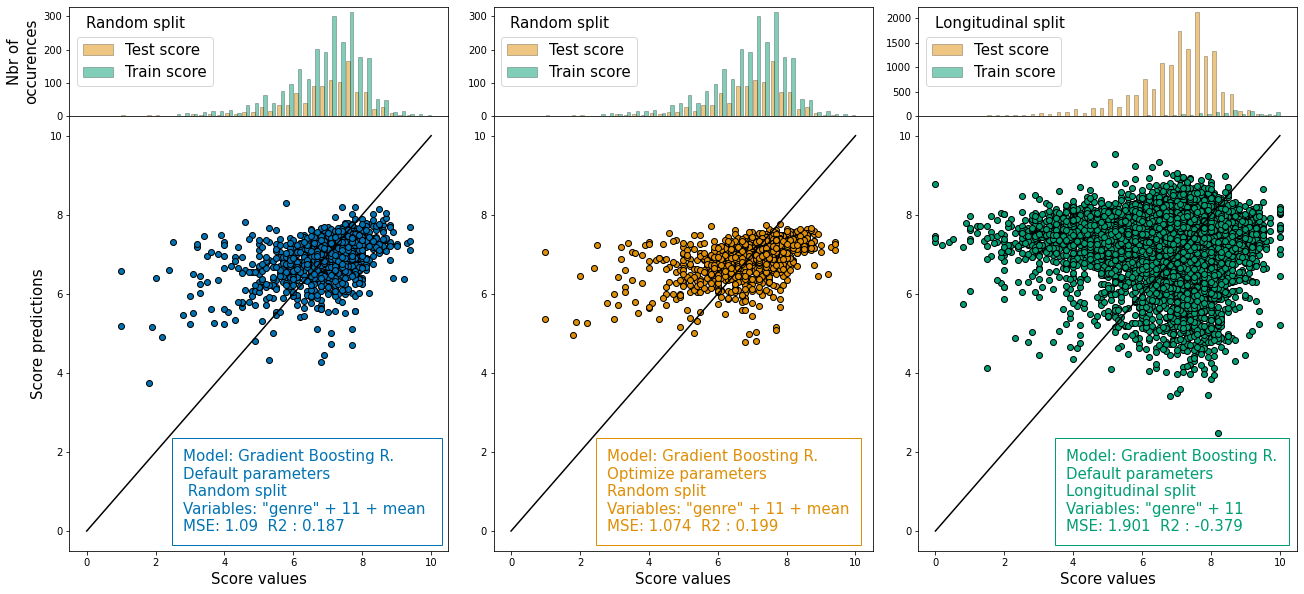

In [ ]:
# Figure : visualize what we have done so far 
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(22)
spec = gridspec.GridSpec(ncols=3, nrows=2,wspace=0.12,hspace=0, height_ratios=[1,4])
palette = sns.color_palette(palette='colorblind',n_colors=6)

# FIRST ROW 
ax00 = fig.add_subplot(spec[0])
ax01 = fig.add_subplot(spec[1])
ax02 = fig.add_subplot(spec[2])

_ = ax00.hist([y_test_task4_2, y_train_task4_2], bins=40,alpha=0.5, label=['Test score', 'Train score'], color=[palette[1],palette[2]],lw=0.5, edgecolor="black")
_ = ax01.hist([y_test_task4_2, y_train_task4_2], bins=40,alpha=0.5, label=['Test score', 'Train score'], color=[palette[1],palette[2]],lw=0.5, edgecolor="black")
_ = ax02.hist([y_test_long, y_train_long], bins=40,alpha=0.5, label=['Test score', 'Train score'], color=[palette[1],palette[2]],lw=0.5, edgecolor="black")


ax00.legend(loc='center left',fontsize=15)
ax01.legend(loc='center left',fontsize=15)
ax02.legend(loc='center left',fontsize=15)

_ = ax00.annotate('Random split',(0,265), color="black",size=15)
_ = ax01.annotate('Random split',(0,265), color="black",size=15)
_ = ax02.annotate('Longitudinal split',(0,1800), color="black",size=15)

ax00.get_xaxis().set_visible(False)
ax01.get_xaxis().set_visible(False)
ax02.get_xaxis().set_visible(False)
ax00.set_ylabel('Nbr of\noccurences', fontsize=15) 

# SECOND ROW
ax10 = fig.add_subplot(spec[3])
ax11 = fig.add_subplot(spec[4])
ax12 = fig.add_subplot(spec[5])

_ = ax10.scatter(y_test_task4_2, pred_task4_2, edgecolor="black",color=palette[0])
_ = ax11.scatter(y_test_task4_2, pred_task4_3,edgecolor="black",color=palette[1])
_ = ax12.scatter(y_test_long, pred_task3_3,edgecolor="black",color=palette[2])

ax10.plot([0,10],[0,10],color="black")
ax11.plot([0,10],[0,10],color="black")
ax12.plot([0,10],[0,10],color="black")

_ = ax10.annotate('Model: Gradient Boosting R.\nDefault parameters\n Random split\nVariables: "genre" + 11 + mean \nMSE: {}  R2 : {}'.format(round(mse_task4_2,3),round(R2_task4_2,3)), 
             (2.8, 0), 
             color=palette[0],
             size=15,
             bbox=dict(boxstyle='square,pad=0.75',facecolor='none', edgecolor=palette[0]))

_ = ax11.annotate('Model: Gradient Boosting R.\nOptimize parameters\nRandom split\nVariables: "genre" + 11 + mean\nMSE: {}  R2 : {}'.format(round(mse_task4_3,3),round(R2_task4_3,3)), 
             (2.8, 0), 
             color=palette[1],
             size= 15,
             bbox=dict(boxstyle='square,pad=0.75',facecolor='none', edgecolor=palette[1]))

_ = ax12.annotate('Model: Gradient Boosting R.\nDefault parameters\nLongitudinal split\nVariables: "genre" + 11\nMSE: {}  R2 : {}'.format(round(mse_task3_3,3),round(R2_task3_3,3)), 
             (3.8, 0), 
             color=palette[2],
             size= 15,
             bbox=dict(boxstyle='square,pad=0.75',facecolor='none', edgecolor=palette[2]))

ax10.set_xlabel('Score values', fontsize=15)
ax11.set_xlabel('Score values', fontsize=15)
ax12.set_xlabel('Score values', fontsize=15)
_=ax10.set_ylabel('Score predictions', fontsize=15)

**Task 4 Question 4** 

Above, is a plot summarizing our 3 models, from left to right we have : 
- model task 4.2 : gradient boosting regressor, with a random split and using the variable 'genre',  the 11 numerical variables and the 'mean' variables as features. The parameters of the model are the default ones. 
- model task 4.3 (best model) : gradient boosting regressor, with a random split and using the variable 'genre',  the 11 numerical variables and the 'mean' variables as features. The parameters of the model were optimized. 
- model task 3.4 : gradient boosting regressor, with a longitudinal split and using the variable 'genre' plus the 11 numerical variables as features. The parameters of the model are the default ones. 


The model 4.3 (plot in the middle) is better than 3.4 (plot on the right) because :
- We use a train and test set that have the same distribution (random split vs longitudinal split)
- We optimized our parameters for the model (learning rate and number of estimators) 
- We are using more meaningful features for predicting the scores (the mean of the numerical values for the previous albums of each artist) 

As a result our R2 is positive and equal to 19.9% for 4.3, and has a smaller MSE.


## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.
>
1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

**Task 5 Question 1**

In [ ]:
data_5_1 = data_cleaned.copy()

print("Number of albums before only keeping artists with #albums > 1: {}".format(data_5_1.shape))

# Select artist w. #albums > 1
data_5_1_artist = data_5_1["artist"].to_frame()
data_5_1_artist['count'] = 1
data_5_1_artist = data_5_1_artist.groupby(by="artist").count() 
data_5_1_artist_gt_1 = data_5_1_artist.loc[data_5_1_artist["count"] > 1]
data_5_1_gt_1 = data_5_1.merge(data_5_1_artist_gt_1, how="inner", on="artist")

print("Number of albums after only keeping artists with #albums > 1: {}".format(data_5_1_gt_1.shape))


Number of albums before only keeping artists with #albums > 1: (16730, 18)
Number of albums after only keeping artists with #albums > 1: (12401, 19)


**Task 5 Question 2**

In [ ]:
data_5_1_gt_1_sorted = data_5_1_gt_1.sort_values(by="releaseyear",ascending=True)
artists_count = data_5_1_artist_gt_1.copy().reset_index()
artists_count["count"] = 0

idx = 0
for index, row in data_5_1_gt_1_sorted.iterrows():
  if idx%1000 == 0:
    print(f'{100*(round(idx/data_5_1_gt_1_sorted.shape[0],2))} %')
  idx += 1
  artist = row['artist']
  cur_count = (artists_count.loc[artists_count["artist"] == artist])["count"].values[0]
  data_5_1_gt_1.at[index,'count'] = cur_count

  artist_idx = artists_count.index[artists_count["artist"] == artist]
  artists_count.at[artist_idx,'count'] = cur_count + 1

0.0 %
8.0 %
16.0 %
24.0 %
32.0 %
40.0 %
48.0 %
56.00000000000001 %
65.0 %
73.0 %
81.0 %
89.0 %
97.0 %


**Task 5 Question 3**

In [ ]:
# Get all w. zero before
data_5_1_first_album=data_5_1_gt_1.loc[data_5_1_gt_1["count"]==0]
# Get all w. 1 before
data_5_1_second_album=data_5_1_gt_1.loc[data_5_1_gt_1["count"]==1]
# Compare
print(f'FIRST ALBUM:\n{data_5_1_first_album.describe()}')
print(f'SECOND ALBUM:\n{data_5_1_second_album.describe()}')

FIRST ALBUM:
             score  releaseyear  danceability  ...      valence        tempo   count
count  3561.000000  3561.000000   3561.000000  ...  3561.000000  3561.000000  3561.0
mean      7.304549  2005.838529      0.511597  ...     0.408011   120.404765     0.0
std       1.232232     8.618118      0.157279  ...     0.179495    15.480857     0.0
min       0.000000  1957.000000      0.087512  ...     0.000010    59.960000     0.0
25%       6.800000  2003.000000      0.403231  ...     0.278045   110.960300     0.0
50%       7.500000  2007.000000      0.506812  ...     0.407778   120.195700     0.0
75%       8.000000  2011.000000      0.625727  ...     0.535390   129.033546     0.0
max      10.000000  2019.000000      0.970000  ...     0.971000   199.958000     0.0

[8 rows x 13 columns]
SECOND ALBUM:
             score  releaseyear  danceability  ...      valence        tempo   count
count  3561.000000  3561.000000   3561.000000  ...  3561.000000  3561.000000  3561.0
mean      7.037

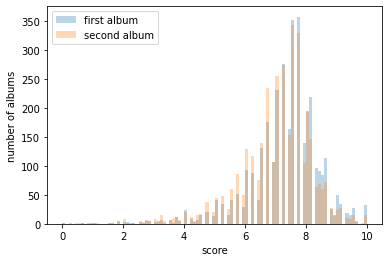

In [ ]:
bins=100
plt.hist(data_5_1_first_album['score'], bins,label='first album',alpha=0.3)
plt.hist(data_5_1_second_album['score'],bins, label='second album',alpha=0.3)
plt.xlabel("score")
plt.ylabel("number of albums")
plt.legend(loc='upper left')
plt.show()

In [ ]:
data_5_1_first_album.shape

(3561, 19)

It is relavant to notice that there are significant gaps in the scores distribution. It is likely that this is caused by the fact that scores are usually rounded to the first decimal place.

**Task 5 Question 4**

From above we can see that the standard deviations are approximately the same, so we can simply use the scipy ttest to test if the means are significantly different. 

In [ ]:
## Students ttest, sklearn
s,p = ttest_ind(data_5_1_first_album['score'],data_5_1_second_album['score'])

In [ ]:
p

2.6568793738456903e-19

We get that p is very low, so with a significance level of 1e-2 we have that the means are significantly different. This is a bit difficult to convey from the histogram in part 3 above, however one can note that there are slightly fewer low score reviews, and sligthly more high score reviews for the first album.

**Task 5 Question 5 Discussion**

Our results suggests that the second album syndrome could exist:
-  We can observe how the score of the second album has a lower mean than the first one.
- If we run a ttest with a Null Hypothesis that the 2 distribution have same mean, we obtain a really low p value which leads us to reject the Null Hypothesis with a reasonably low significance level of 1e-2.

However, the difference in mean while being significant is really small. So the question could be that even if it exists, does it matter?

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


**Task 6 part 1**

In [ ]:
data_6_1=data_5_1_gt_1.copy()

In [ ]:
# Selecting only first and second albums
data_6_1_first_album=data_6_1.loc[data_6_1["count"]==0]
data_6_1_second_album=data_6_1.loc[data_6_1["count"]==1]

# Merging first and second albums
data_6_1_first_2_albums=data_6_1_first_album.merge(data_6_1_second_album, how="inner", on="artist",suffixes=("_first", "_second"))

# Creating score_diff
data_6_1_first_2_albums["score_diff"]=data_6_1_first_2_albums["score_second"]-data_6_1_first_2_albums["score_first"]

# Creating time_diff
data_6_1_first_2_albums["time_diff"]=data_6_1_first_2_albums["releaseyear_second"]-data_6_1_first_2_albums["releaseyear_first"]
data_6_1_first_2_albums["time_diff"]=data_6_1_first_2_albums["time_diff"]*365

# Creating did_style_change
features=["key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]
features_first=[x+"_first" for x in features]
features_second=[x+"_second" for x in features]
variances_features=data_6_1[features].std(axis=0)
variances_features=np.power(variances_features.to_numpy(),2)
data_6_1_first_2_albums["did_style_change"]=data_6_1_first_2_albums.apply(lambda x: distance.seuclidean(x[features_first].to_numpy(), x[features_second].to_numpy(),variances_features), axis=1)
data_6_1_first_2_albums=data_6_1_first_2_albums.sort_values(by="did_style_change", ascending=True)
N=data_6_1_first_2_albums.shape[0]
N_80=round(N*80/100)
data_6_1_first_2_albums.loc[:N_80, "did_style_change"]=0
data_6_1_first_2_albums.loc[N_80:, "did_style_change"]=1
data_6_1_first_2_albums["did_style_change"]=data_6_1_first_2_albums["did_style_change"].astype(int)

# Fetching wanted columns
data_6_1_first_2_albums=data_6_1_first_2_albums[['score_diff', 'time_diff', 'did_style_change']]

**Plot distribution of score diff**

We plot the distribution of the score difference. We see that the score difference tends to be negative, which will be confirmed by the model that we fit below.

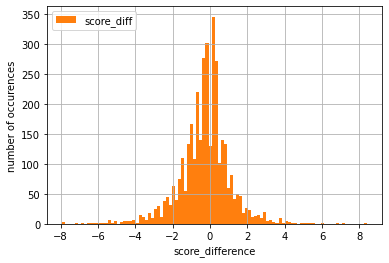

In [ ]:
_=data_6_1_first_2_albums["score_diff"].hist(bins=100)
bins=100
plt.hist(data_6_1_first_2_albums["score_diff"], bins,label='score_diff')
plt.xlabel("score_difference")
plt.ylabel("number of occurences")
plt.legend(loc='upper left')
plt.show()

**Task 6 part 2**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import diagnostic

# Declaring model
mod = smf.ols(formula='score_diff ~ 1', data=data_6_1_first_2_albums)

# Fitting model
np.random.seed(3)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        17:06:58   Log-Likelihood:                -6205.3
No. Observations:                3561   AIC:                         1.241e+04
Df Residuals:                    3560   BIC:                         1.242e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2675      0.023    -11.548      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [ ]:
print(f'MEAN computed separately: {data_6_1_first_2_albums["score_diff"].mean()}')

MEAN computed separately: -0.26750912664981724


By using the model 'score_diff ~ 1' we are doing regression with a constant function. What we expect is to have as value of the intercept the mean value of all score_diff values.

By computing separately the mean we verify that it equals to the intercept. 

**Task 6 part 3**

Everytime we use a constant as model R2 is going to be equal to 0 since the **unexplained variance** and the **variance of outcomes y** are going to have the same value, so their fraction is going to be 1.

**Task 6 part 4**



In [ ]:
# Declaring model
mod = smf.ols(formula='score_diff ~ C(did_style_change) + time_diff', data=data_6_1_first_2_albums)
#mod = smf.ols(formula='score_diff ~ C(did_style_change)', data=data_6_1_first_2_albums)

# Fitting model
np.random.seed(3)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     30.14
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.05e-13
Time:                        17:06:58   Log-Likelihood:                -6175.4
No. Observations:                3561   AIC:                         1.236e+04
Df Residuals:                    3558   BIC:                         1.238e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Task 6 part 5**

The difference in score does not depend on did_style_change because of its very high p-value. The high p-value means that there is a high probability of this feature to have a coefficient of 0. Even when the score difference is fitted solely with did_style_change, the did_style_change has a statistically insignificant impact on the score difference.

Instead time_diff has a really low p-value which means it is significant.
However we see that with time, the difference in score becomes more negative. This means as the score_diff gets higher, the album 1 has a higher score than album 2. This goes against our theory of album 2 becomming better with time.

Furthermore, for no time difference there is a magic difference of -0.152 given by the bias term.

The conclusion must be that did_style_change does not explain the difference, and the score does not better with time.



**Task 6 part 6**

In [ ]:
# Standardize time_diff
data_6_1_first_2_albums_normalized=data_6_1_first_2_albums.copy()
mean_time_diff=data_6_1_first_2_albums_normalized['time_diff'].mean()
std_time_diff=data_6_1_first_2_albums_normalized['time_diff'].std()
data_6_1_first_2_albums_normalized['time_diff']=(data_6_1_first_2_albums_normalized['time_diff']-mean_time_diff)/std_time_diff

# Declaring model
mod = smf.ols(formula='score_diff ~ C(did_style_change) + time_diff', data=data_6_1_first_2_albums_normalized)

# Fitting model
np.random.seed(3)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     30.14
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.05e-13
Time:                        17:06:58   Log-Likelihood:                -6175.4
No. Observations:                3561   AIC:                         1.236e+04
Df Residuals:                    3558   BIC:                         1.238e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Task 6 part 7**

The fitted model becomes easier to interpret. Since the number of days since last album can be quite high for some albums, the coefficent becomes very small if a standardization is not performed. Standardizing this feature gives a more interpretable coefficient of -0.1785 per standardized day unit.


**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


**Task 7 part 1**


If the Second Album Syndrome existed then we would expect that the third album would be better than the previous, because in this way the artist would make up previous failure. 

For the difference between the third and the fourth it will probably be more equal since one can expect the artist potential to have saturated, or learned its niche. If the score keeps decreasing for the third and fourth album the case can rather be that artists just get worse over time.

When an artist creates his or her first album, it will have to be very good since this is how they will get famous in the first place and get opportunities to create more albums.

**Task 7 part 2**

In [ ]:
intersting_cols = ['score']
first = data_5_1_gt_1.loc[data_5_1_gt_1['count'] == 0][intersting_cols]
second = data_5_1_gt_1.loc[data_5_1_gt_1['count'] == 1][intersting_cols]
third = data_5_1_gt_1.loc[data_5_1_gt_1['count'] == 2][intersting_cols]
fourth = data_5_1_gt_1.loc[data_5_1_gt_1['count'] == 3][intersting_cols]

first_mean = float(first.mean())
second_mean = float(second.mean())
third_mean = float(third.mean())
fourth_mean = float(fourth.mean())

first_std = float(first.sem())
second_std = float(second.sem())
third_std = float(third.sem())
fourth_std = float(fourth.sem())

s,p = ttest_ind(second['score'], third['score'])

1st album : mean = 7.305 and std error= 0.021
2nd album : mean = 7.037 and std error= 0.021
3th album : mean = 7.047 and std error= 0.028
4th album : mean = 7.039 and std error= 0.036


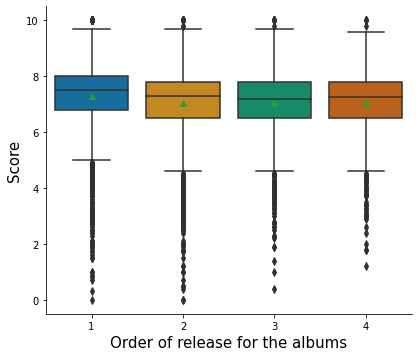

In [ ]:
means = [first_mean,second_mean,third_mean,fourth_mean]
stds = [first_std,second_std,third_std,fourth_std]

data_plot = data_5_1_gt_1[['score', 'count']].copy()

data_plot = data_plot.drop(data_plot[data_plot['count'] > 3].index)
data_plot['count'] =data_plot['count']+1
# Visualize the distribution of scores w.r.t. to the genre 
plot = sns.catplot(x="count", y="score", kind="box", data=data_plot,palette='colorblind', ci ="sd",showmeans=True)
plot.fig.set_figwidth(6)
plot.fig.set_figheight(5)
plot.set_xlabels('Order of release for the albums', fontsize=15)
plot.set_ylabels('Score', fontsize=15)

print("1st album : mean = {} and std error= {}".format(round(means[0],3),round(stds[0],3)))
print("2nd album : mean = {} and std error= {}".format(round(means[1],3),round(stds[1],3)))
print("3th album : mean = {} and std error= {}".format(round(means[2],3),round(stds[2],3)))
print("4th album : mean = {} and std error= {}".format(round(means[3],3),round(stds[3],3)))

In the boxplot figure and the means directly computed we observe:
-  the first albums have a higher mean score than the following ones
-  from the second album towards the mean score is stable and doesn't change significatively

In [ ]:
p # high, they are equal

0.7724021668033655

In addition by running a ttest to test if the mean of the 2° and 3° album are equal, we obtain a really high value.

This confirms that the mean does not change anymore after the second album as we also observed in the boxlpot.

**Task 7 part 3**

By doing a ttest on the difference in mean of the scores of the second and third albums we obtain a really high p-value which leads us to say that the means of the second and third value are the same.

This is in contrast to what we would we expect from the third album if the "Second Album Syndrom" were true (i.e we would expect the score of the third album to get higher).
In addition the observed significantly different mean for the second album was not unique to the second album, the third and fourth also differed from the first.

We are therefore led to think that the "Second Album Syndrome" may not exist in the sense that there is something special only about the second album. Instead we are led to think that the first album is usually better than the other albums since it is the album which lead to success and has to be really good to be recognized.

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

In [ ]:
talents = np.random.uniform(low=2.0, high=8.0, size=(1000,1))
album_1 = np.random.normal(talents,1)
good_bands = talents[album_1 >= 6]

album_2 = np.random.normal(good_bands,1)
album_3 = np.random.normal(good_bands,1)

In [ ]:
album_1_mean = np.mean(album_1)
album_1_mean_good_bands = np.mean(album_1[album_1 >= 6])
album_2_mean = np.mean(album_2)
album_3_mean = np.mean(album_3)

print("Means of 1st album for all artists:\n" +  
       "album_1 mean: {}\n".format(album_1_mean) + 
       "Now considering only means for the bands that produced 3 albums:\n" +
       "album_1 mean: {}, album_2 mean: {}, album_3 mean: {}".format(album_1_mean_good_bands, album_2_mean, album_3_mean))

Means of 1st album for all artists:
album_1 mean: 4.969242382784378
Now considering only means for the bands that produced 3 albums:
album_1 mean: 7.2107893173969115, album_2 mean: 6.669847845810361, album_3 mean: 6.796124737970176


For bands that have more than 1 album ( 3 albums ) we observe the second album effect! Is this just a rare coincidence for one batch of random samples? Let's compactly test this 10 more times for survivor bands:

In [ ]:
for i in range(10):
  talents = np.random.uniform(low=2.0, high=8.0, size=(1000,1))
  album_1 = np.random.normal(talents,1)
  good_bands = talents[album_1 >= 6]

  album_2 = np.random.normal(good_bands,1)
  album_3 = np.random.normal(good_bands,1)
  album_1_mean = np.mean(album_1)
  album_1_mean_good_bands = np.mean(album_1[album_1 >= 6])
  album_2_mean = np.mean(album_2)
  album_3_mean = np.mean(album_3)

  print("album_1 mean: {}, album_2 mean: {}, album_3 mean: {}".format(album_1_mean_good_bands, album_2_mean, album_3_mean))

album_1 mean: 7.300376922496115, album_2 mean: 6.73475703268518, album_3 mean: 6.689908240887029
album_1 mean: 7.183533530370854, album_2 mean: 6.876354767708868, album_3 mean: 6.769459838173379
album_1 mean: 7.243757194140259, album_2 mean: 6.64587209340123, album_3 mean: 6.600022351414425
album_1 mean: 7.305697715908282, album_2 mean: 6.873070627482766, album_3 mean: 6.836622008700825
album_1 mean: 7.232430504329468, album_2 mean: 6.656176112075167, album_3 mean: 6.73365303097384
album_1 mean: 7.2276998396633045, album_2 mean: 6.8398919690529025, album_3 mean: 6.705456507007119
album_1 mean: 7.253403034949874, album_2 mean: 6.865578724259208, album_3 mean: 6.89146072505193
album_1 mean: 7.249952644213883, album_2 mean: 6.750757307635764, album_3 mean: 6.738688928712266
album_1 mean: 7.324848162265915, album_2 mean: 6.785023910320364, album_3 mean: 6.852865397897168
album_1 mean: 7.117808030055744, album_2 mean: 6.670441364027907, album_3 mean: 6.769941983457579


The effect persists, so why does this happen?

The bands that will be in the batch with "survivors" are:    
- Lucky artists with low talent
- Artist with high talent

To survive the first "selection" you must have an album score over 6.0. Thus we take the mean of albums with scores only higher than 6.0, this will be a mean between 6 and 8.

When we take the means of the second and third album, the lucky are not as lucky again and we get several album scores below 6.0 which lowers the mean score of the second albums!

We observe the second album syndrome because only bands that are succesfull with their first are likely to create another album! However, being successfull with your first album can be purely luck! That's why there are many cases where we observe a second and third album with a lower score than the first, the luck for the lucky has run out!

Luck explains why we could not find a good predictor in task 6, such as time between albums and change of style, they were simply not the reason. The reason was the luck of the bands with low talent which managed to have a really good first album.
